# DoubleDrift

#### Project description:
_Adaptation of experiment 1 (perception) of Lisa & Cavanagh, 2015, Current Biology<br>
(http://dx.doi.org/10.1016/j.cub.2015.08.021) for the AMU Neuroscience Master APP 2024 courses._

#### Hypothesis: 
_Participants mislocalize perceptively the drifting gabor but saccade to correctly to its<br>
 physical position_
 
#### Exercice for APP2024:
_Analyse data to reach an adapted version of Figure 1 of [Lisa & Cavanagh, 2015, Current Biology](http://dx.doi.org/10.1016/j.cub.2015.08.021)_

<img src="img/Lisi_Cavanagh_2015_CB_Figure1.png" width=700 alt="Figure 1">
<!-- ![Lisi_Cavanagh_2015_CB_Figure1.png]()  -->

#### Eye movement data analysis:

- [x] Saccade analysis output graph
- [x] Saccade parameter graph
- [ ] Saccade landing analysis

In [3]:
# Imports
import os
import numpy as np
import pandas as pd
from scipy.stats import norm, linregress

# figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from plot_utils import plotly_template
import plotly.express as px

In [4]:
# Define folders
base_dir = '..'
data_dir = '{}/data'.format(base_dir)
subject = 'sub-01'
session = 'ses-02'
subject_num = subject[4:]
fig_dir = '{}/{}/{}/beh/figures'.format(data_dir, subject, session)

In [5]:
# Save dataframe
df_all = pd.read_csv('{}/{}/{}/beh/{}_task-DoubleDriftSaccade_data.csv'.format(data_dir, subject, session, subject))

#### Saccade analysis output graph

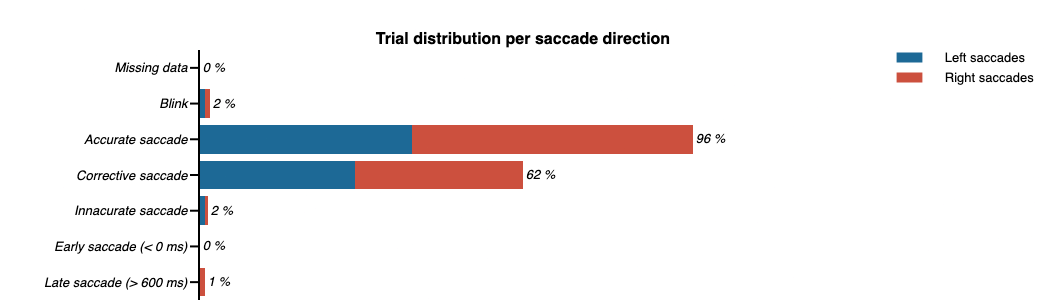

In [16]:
# general figure settings
template_specs = dict(  axes_color="rgba(0, 0, 0, 1)",
                        axes_width=2,
                        axes_font_size=13,
                        bg_col="rgba(255, 255, 255, 1)",
                        font='Helvetica',
                        title_font_size=15,
                        plot_width=1.5)
fig_template = plotly_template(template_specs)

# figure specific settings
x_range = [0,250]
colors_panel = px.colors.qualitative.Prism
subplot_titles = ('<b>Trial distribution per saccade direction<b>', '<b>Trial distribution per external motion orientation<b>')
analysis_crit = ['<i>Missing data<i>', '<i>Blink<i>', '<i>Accurate saccade<i>', '<i>Corrective saccade<i>', 
                 '<i>Innacurate saccade<i>', '<i>Early saccade (< 0 ms)<i>', '<i>Late saccade (> 600 ms)<i>']
analysis_crit_df = ['miss_time_trial', 'blink_trial', 'main_sac_trial', 'cor_sac_trial',
                    'innacurate_sac_trial', 'early_sac_trial', 'late_sac_trial']
x_label = 'Trials'
mos = ['-75 deg', '-60 deg', '-45 deg', '-30 deg', '-15 deg', '+15 deg', '+30 deg', '+45 deg', '+60 deg', '+75 deg']
sds = ['Left saccades', 'Right saccades']
mo_cols = [colors_panel[0], colors_panel[1], colors_panel[2], colors_panel[3], colors_panel[4], 
           colors_panel[5], colors_panel[6], colors_panel[7], colors_panel[8], colors_panel[9]]
sd_cols = [colors_panel[1], colors_panel[7]]
x_legend = 1.15
y_legend_step = 0.08
y_legend_sd = 0.97
y_legend_mo = 0.36
rad_leg = 0.04

# subplot settings
rows, cols = 1, 1
fig_height, fig_width = 300,800
column_widths,row_heights = [1],[1]
sb_specs = [[{}]]
fig = make_subplots(rows=rows, cols=cols, specs=sb_specs, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.05, 
                    column_widths=column_widths, row_heights=row_heights, shared_yaxes=True, subplot_titles=subplot_titles)

# Right / Left saccades
# ---------------------
for sd_num, sd in enumerate(sds):
    # plot
    fig.append_trace(go.Bar(y=analysis_crit, x=df_all.loc[(df_all.ext_mot_pos == sd_num + 1)][analysis_crit_df].sum(), 
                            orientation='h', name=sd, marker_color=sd_cols[sd_num]), row=1, col=1)
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_sd - y_legend_step * sd_num, 
                       text=sd, showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', yanchor='middle')
    fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=sd_cols[sd_num],line_width=0,
                  x0=x_legend - 0.05 - rad_leg / 2, y0=y_legend_sd - y_legend_step * sd_num - rad_leg / 2, 
                  x1=x_legend - 0.05 + rad_leg / 2, y1=y_legend_sd - y_legend_step * sd_num + rad_leg / 2)
    
# annotation value
for num_crit, crit_name in enumerate(analysis_crit_df):
    fig.add_annotation(x=df_all[crit_name].sum(), y=num_crit, text='<i>{:1.0f} %<i>'.format(df_all[crit_name].mean()*100), 
                       showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', row=1, col=1)

# axes settings
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=x_range, row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], autorange="reversed", row=row+1, col=col+1)
    
# Save figure
fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=200, 
                  margin_r=200, margin_t=50, margin_b=0, barmode='stack', showlegend=False)
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)
fig.write_image('{}/{}_trial_dist.pdf'.format(fig_dir, subject))

#### Saccade parameter graph

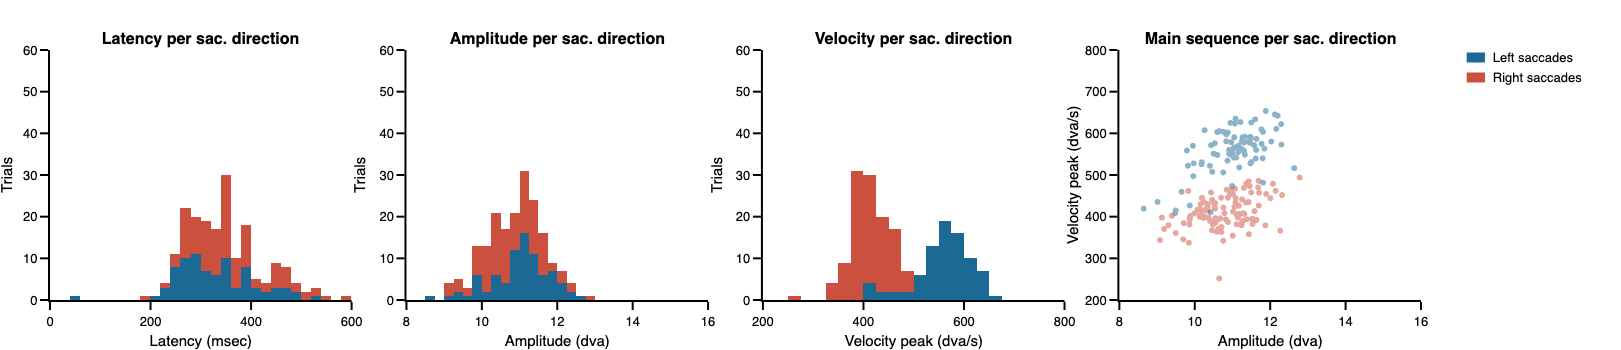

In [20]:
# figure specific settings
subplot_titles = ('<b>Latency per sac. direction<b>', '<b>Amplitude per sac. direction<b>', '<b>Velocity per sac. direction<b>', '<b>Main sequence per sac. direction<b>',
                  '<b>Latency per ext. mot. ori.<b>', '<b>Amplitude per ext. mot. ori.<b>', '<b>Velocity per ext. mot. ori.<b>', '<b>Main sequence per ext. mot. ori.<b>',)

# subplot settings
rows, cols = 1, 4
leg_mergin = 200
fig_height, fig_width = 350, 350 * 4 + leg_mergin
column_widths, row_heights = [1,1,1,1],[1]
sb_specs = [[{},{},{},{}]]
fig = make_subplots(rows=rows, cols=cols, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.04, 
                    column_widths=column_widths, row_heights=row_heights, subplot_titles=subplot_titles)

x_legend = 1.05
y_legend_step = 0.08
y_legend_sd = 0.97
y_legend_mo = 0.36
rad_leg = 0.04

# Right / Left saccades
# ---------------------
for sd_num, sd in enumerate(sds):
    # plot
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.ext_mot_pos == sd_num+1)]['sac_lat_trial'], name=sd, marker_color=sd_cols[sd_num], xbins_size = 20),row=1, col=1)
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.ext_mot_pos == sd_num+1)]['sac_amp_trial'], name=sd, marker_color=sd_cols[sd_num], xbins_size = 0.25),row=1, col=2)
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.ext_mot_pos == sd_num+1)]['sac_vpeak_trial'], name=sd, marker_color=sd_cols[sd_num], xbins_size = 25),row=1, col=3)
    fig.append_trace(go.Scatter(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.ext_mot_pos == sd_num+1)]['sac_amp_trial'],
                                y=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.ext_mot_pos == sd_num+1)]['sac_vpeak_trial'],name=sd, mode='markers',marker_color=sd_cols[sd_num],
                                line_width=0, opacity=0.5
                               ),row=1, col=4)
    
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_sd-y_legend_step*sd_num, 
                       text=sd, showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', yanchor='middle')
    fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=sd_cols[sd_num],line_width=0,
                  x0=x_legend-0.01-rad_leg/6, y0=y_legend_sd-y_legend_step*sd_num-rad_leg/2, 
                  x1=x_legend-0.01+rad_leg/6, y1=y_legend_sd-y_legend_step*sd_num+rad_leg/2)


# axes settings
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[0, 60], title='Trials',row=row+1, col=col+1)

fig.layout.update(xaxis_range =[0, 600],
                  xaxis2_range=[8, 16], 
                  xaxis3_range=[200, 800], 
                  xaxis4_range=[8, 16], 
                  yaxis4_range=[200, 800], 
                  xaxis_title ='Latency (msec)', 
                  xaxis2_title='Amplitude (dva)',
                  xaxis3_title='Velocity peak (dva/s)',
                  xaxis4_title='Amplitude (dva)',
                  yaxis4_title='Velocity peak (dva/s)',
                 )

# Save figure
fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=50, 
                  margin_r=leg_mergin, margin_t=50, margin_b=50, barmode='stack', showlegend=False)
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)    
fig.write_image('{}/{}_saccade_dist.pdf'.format(fig_dir, subject))